# Do the Economic Factors of an LGA Impact Crime?
## Data Science Group Project
**Group 37**
- Andrew Chaiban
- Agriya Mathur

Our project aims to analyse and compare criminal data in Sydney and investigate a 
relationship with key factors such as income data in corresponding areas of Sydney and NSW. 
Through our analysis we are aiming to find a relationship between key economic factors 
such as average household income and percentage of people having completed year 12 education and correlate this to the types of crimes 
committed  in  that  area.  By  closely  analysing  relationships  between  these  economic 
factors and the crimes committed we intend to draw informed conclusions.

Goals: 
* Visualise crimes across Sydney LGA’s displaying where the majority of different crimes are committed.  
* Visualise  economic  factors  of  different  LGA’s  such  as  number  of  workers, household income, and government allowances. 
* Map total crimes, and types of crimes by months of the year. 
* Investigate the correlation between the economic factors of a particular area to the types of crimes committed as well as number of crimes committed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import crime data
# ref: https://www.bocsar.nsw.gov.au/Pages/bocsar_datasets/Offence.aspx

#1995 to June 2021 data
Incidents_NSW = pd.read_excel('files/Incident_by_NSW.xlsx')
Incident_by_lga = pd.read_excel('files/RCI_offencebymonth_LGA.xlsx')

## Data Exploration

In [3]:
Incidents_NSW

,State,Offence category,Subcategory,2020 population,2021 population,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,...,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,total_sum
0,NSW,Homicide,Murder *,8089817,8089817,9,11,10,11,7,...,5,4,5,6,3,6,1,3,5,2397
1,NSW,Homicide,Attempted murder,8089817,8089817,1,3,4,6,5,...,0,3,3,2,3,4,1,2,2,1610
2,NSW,Homicide,"Murder accessory, conspiracy",8089817,8089817,0,2,0,0,2,...,0,0,0,0,0,0,0,0,0,154
3,NSW,Homicide,Manslaughter *,8089817,8089817,0,2,1,2,1,...,0,0,0,0,1,0,0,0,0,284
4,NSW,Assault,Domestic violence related assault,8089817,8089817,613,591,625,638,602,...,2796,2918,3157,3014,2649,2737,2683,2732,2605,658721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,NSW,Against justice procedures,Fail to appear,8089817,8089817,141,143,135,121,158,...,57,65,76,69,79,49,53,62,93,30430
58,NSW,Against justice procedures,Resist or hinder officer,8089817,8089817,397,347,338,322,289,...,410,475,553,576,448,433,454,412,388,167496
59,NSW,Against justice procedures,Other offences against justice procedures,8089817,8089817,300,294,387,303,384,...,122,114,200,154,182,161,159,181,165,39776
60,NSW,Transport regulatory offences,Transport regulatory offences,8089817,8089817,40,57,57,53,86,...,4084,3910,8151,7441,6056,7263,7197,7469,7427,1356606


In [4]:
Incidents_NSW.describe()

,2020 population,2021 population,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,total_sum
count,62.0,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01
mean,8089817.0,8089817.0,707.935484,643.677419,715.177419,657.080645,679.725806,670.548387,692.838710,726.677419,...,816.274194,808.903226,921.548387,939.274194,854.983871,910.645161,835.483871,875.112903,870.451613,2.924585e+05
std,0.0,0.0,1369.388758,1226.753142,1345.548112,1236.677003,1292.723877,1281.540936,1351.288058,1393.380202,...,1200.051682,1190.901046,1491.505760,1492.924022,1307.349596,1421.570675,1346.193343,1392.077044,1376.464593,4.502672e+05
min,8089817.0,8089817.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.540000e+02
25%,8089817.0,8089817.0,22.000000,18.500000,25.750000,22.500000,20.750000,16.250000,21.250000,23.000000,...,36.750000,41.500000,45.750000,38.000000,38.000000,41.000000,40.500000,32.750000,38.500000,1.368875e+04
50%,8089817.0,8089817.0,172.500000,140.500000,153.000000,160.500000,143.500000,134.500000,149.500000,147.500000,...,184.000000,207.500000,255.500000,219.500000,209.500000,205.000000,207.500000,212.000000,196.000000,8.021850e+04
75%,8089817.0,8089817.0,417.000000,416.250000,469.500000,422.750000,452.250000,489.000000,485.750000,545.500000,...,1238.000000,1118.250000,1129.000000,1235.250000,1054.250000,1220.750000,1107.750000,1173.500000,1272.250000,3.566940e+05
max,8089817.0,8089817.0,6178.000000,5351.000000,5754.000000,5528.000000,5741.000000,5610.000000,6227.000000,5791.000000,...,4716.000000,4779.000000,8151.000000,7441.000000,6056.000000,7263.000000,7197.000000,7469.000000,7427.000000,2.203728e+06


In [5]:
Incident_by_lga

,LGA,Offence category,Subcategory,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,...,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,total_lga
0,Albury,Homicide,Murder *,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,21
1,Albury,Homicide,Attempted murder,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,11
2,Albury,Homicide,"Murder accessory, conspiracy",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Albury,Homicide,Manslaughter *,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,Albury,Assault,Domestic violence related assault,7,7,7,2,7,6,4,...,25,30,29,34,45,30,21,22,30,6160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8117,In Custody,Against justice procedures,Fail to appear,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,226
8118,In Custody,Against justice procedures,Resist or hinder officer,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,128
8119,In Custody,Against justice procedures,Other offences against justice procedures,8,5,18,4,3,6,3,...,1,2,3,3,3,3,5,5,6,1031
8120,In Custody,Transport regulatory offences,Transport regulatory offences,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [6]:
Incident_by_lga.describe()

,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,1995-10-01 00:00:00,...,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,total_lga
count,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,...,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000
mean,5.404088,4.913568,5.459370,5.015883,5.188747,5.118690,5.288845,5.547156,5.586432,6.014159,...,6.231101,6.174834,7.034721,7.170032,6.526594,6.951490,6.377739,6.680251,6.644669,2232.507387
std,22.197460,20.476943,22.280497,20.397186,21.588156,20.420779,21.592242,22.300200,23.704378,25.356479,...,21.680271,21.555653,32.595758,31.418024,28.229897,30.991148,30.137613,29.368774,30.463215,7642.113519
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,202.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,1247.750000
max,601.000000,575.000000,632.000000,629.000000,585.000000,478.000000,558.000000,587.000000,647.000000,660.000000,...,705.000000,638.000000,1686.000000,1398.000000,1452.000000,1690.000000,1670.000000,1436.000000,1508.000000,179568.000000


### What are the major offences in NSW?

In [7]:
#drop unnecessary columns
Incidents_NSW = Incidents_NSW.drop(columns=['2020 population', '2021 population'])

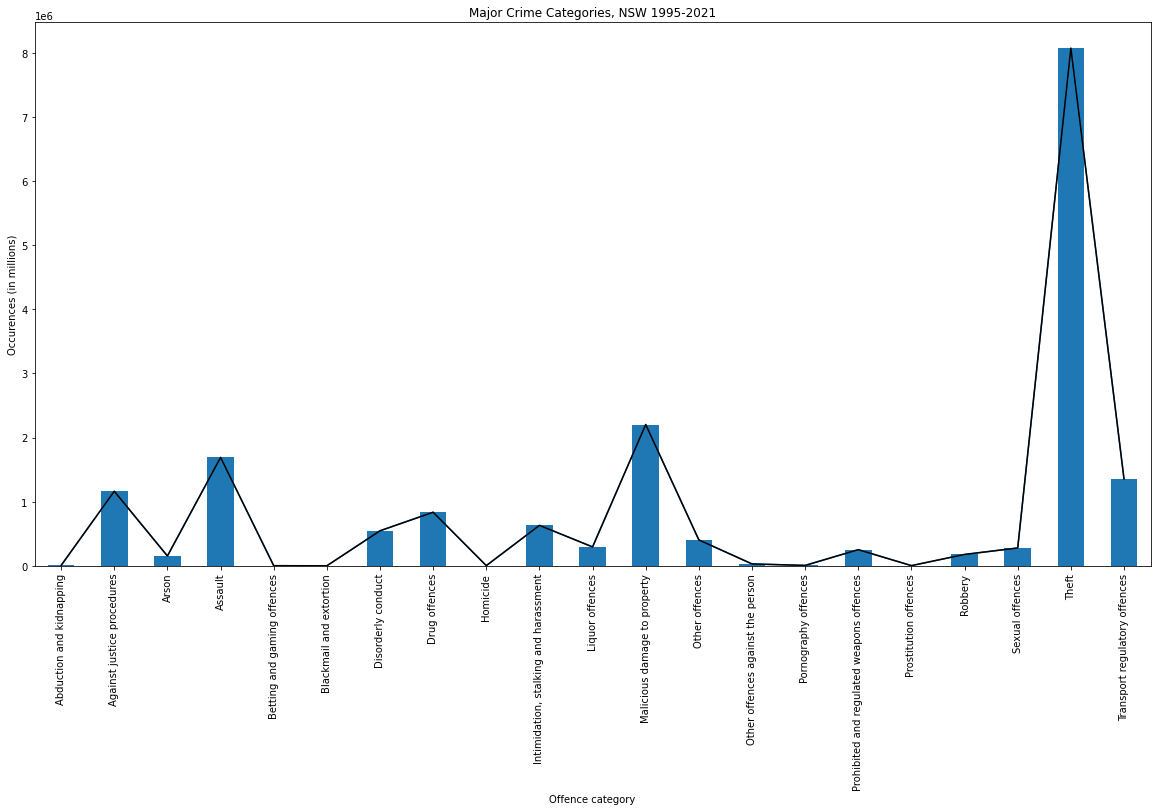

In [8]:
majorOffence_total = Incidents_NSW.groupby('Offence category')['total_sum'].sum()

majorOffence_total.plot(kind='bar')
majorOffence_total.plot(figsize=(20,10))
majorOffence_total.plot(ylabel='Occurences (in millions)', title='Major Crime Categories, NSW 1995-2021', color='black')
plt.xticks(rotation=90)
plt.show()

__Theft__ clearly makes up the vast majority of crimes committed historically in NSW by far. But what are the different kinds of theft?

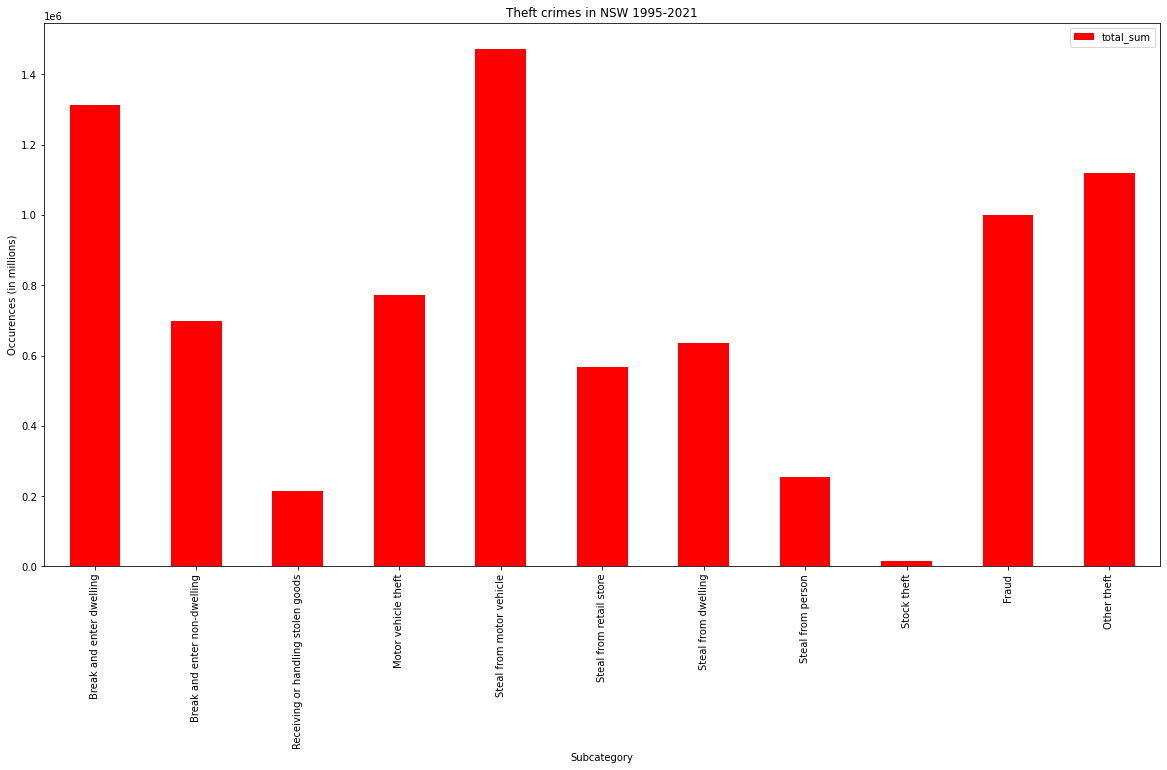

In [9]:
theft_df = Incidents_NSW[Incidents_NSW['Offence category'] == 'Theft']

theft_df.plot(kind='bar',x='Subcategory', y='total_sum', 
              ylabel='Occurences (in millions)', title='Theft crimes in NSW 1995-2021', figsize=(20,10), color = 'red')
plt.show()

Lets take a look at the specific offence types to get a more accurate understanding

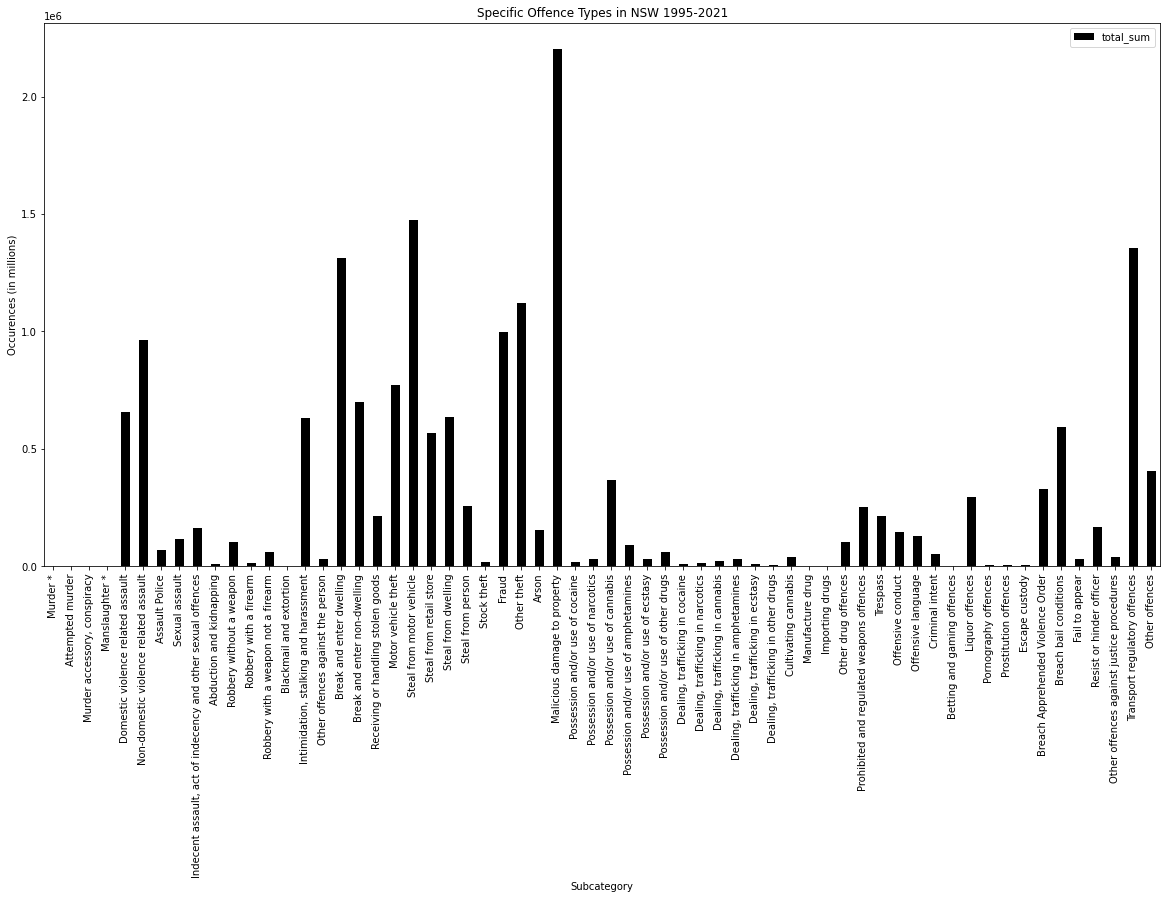

In [10]:
Incidents_NSW.plot(kind='bar',x='Subcategory', y='total_sum', 
              ylabel='Occurences (in millions)', title='Specific Offence Types in NSW 1995-2021', 
                   figsize=(20,10), color = 'black')
plt.show()

__Malicious Damage to Property__ is the most common type of offense, followed by __Steal from Motor Vehicle__, __Transport regulatory offences__ and __Break and Enter Dwelling__.

### What are the most dangerous LGAs in NSW?

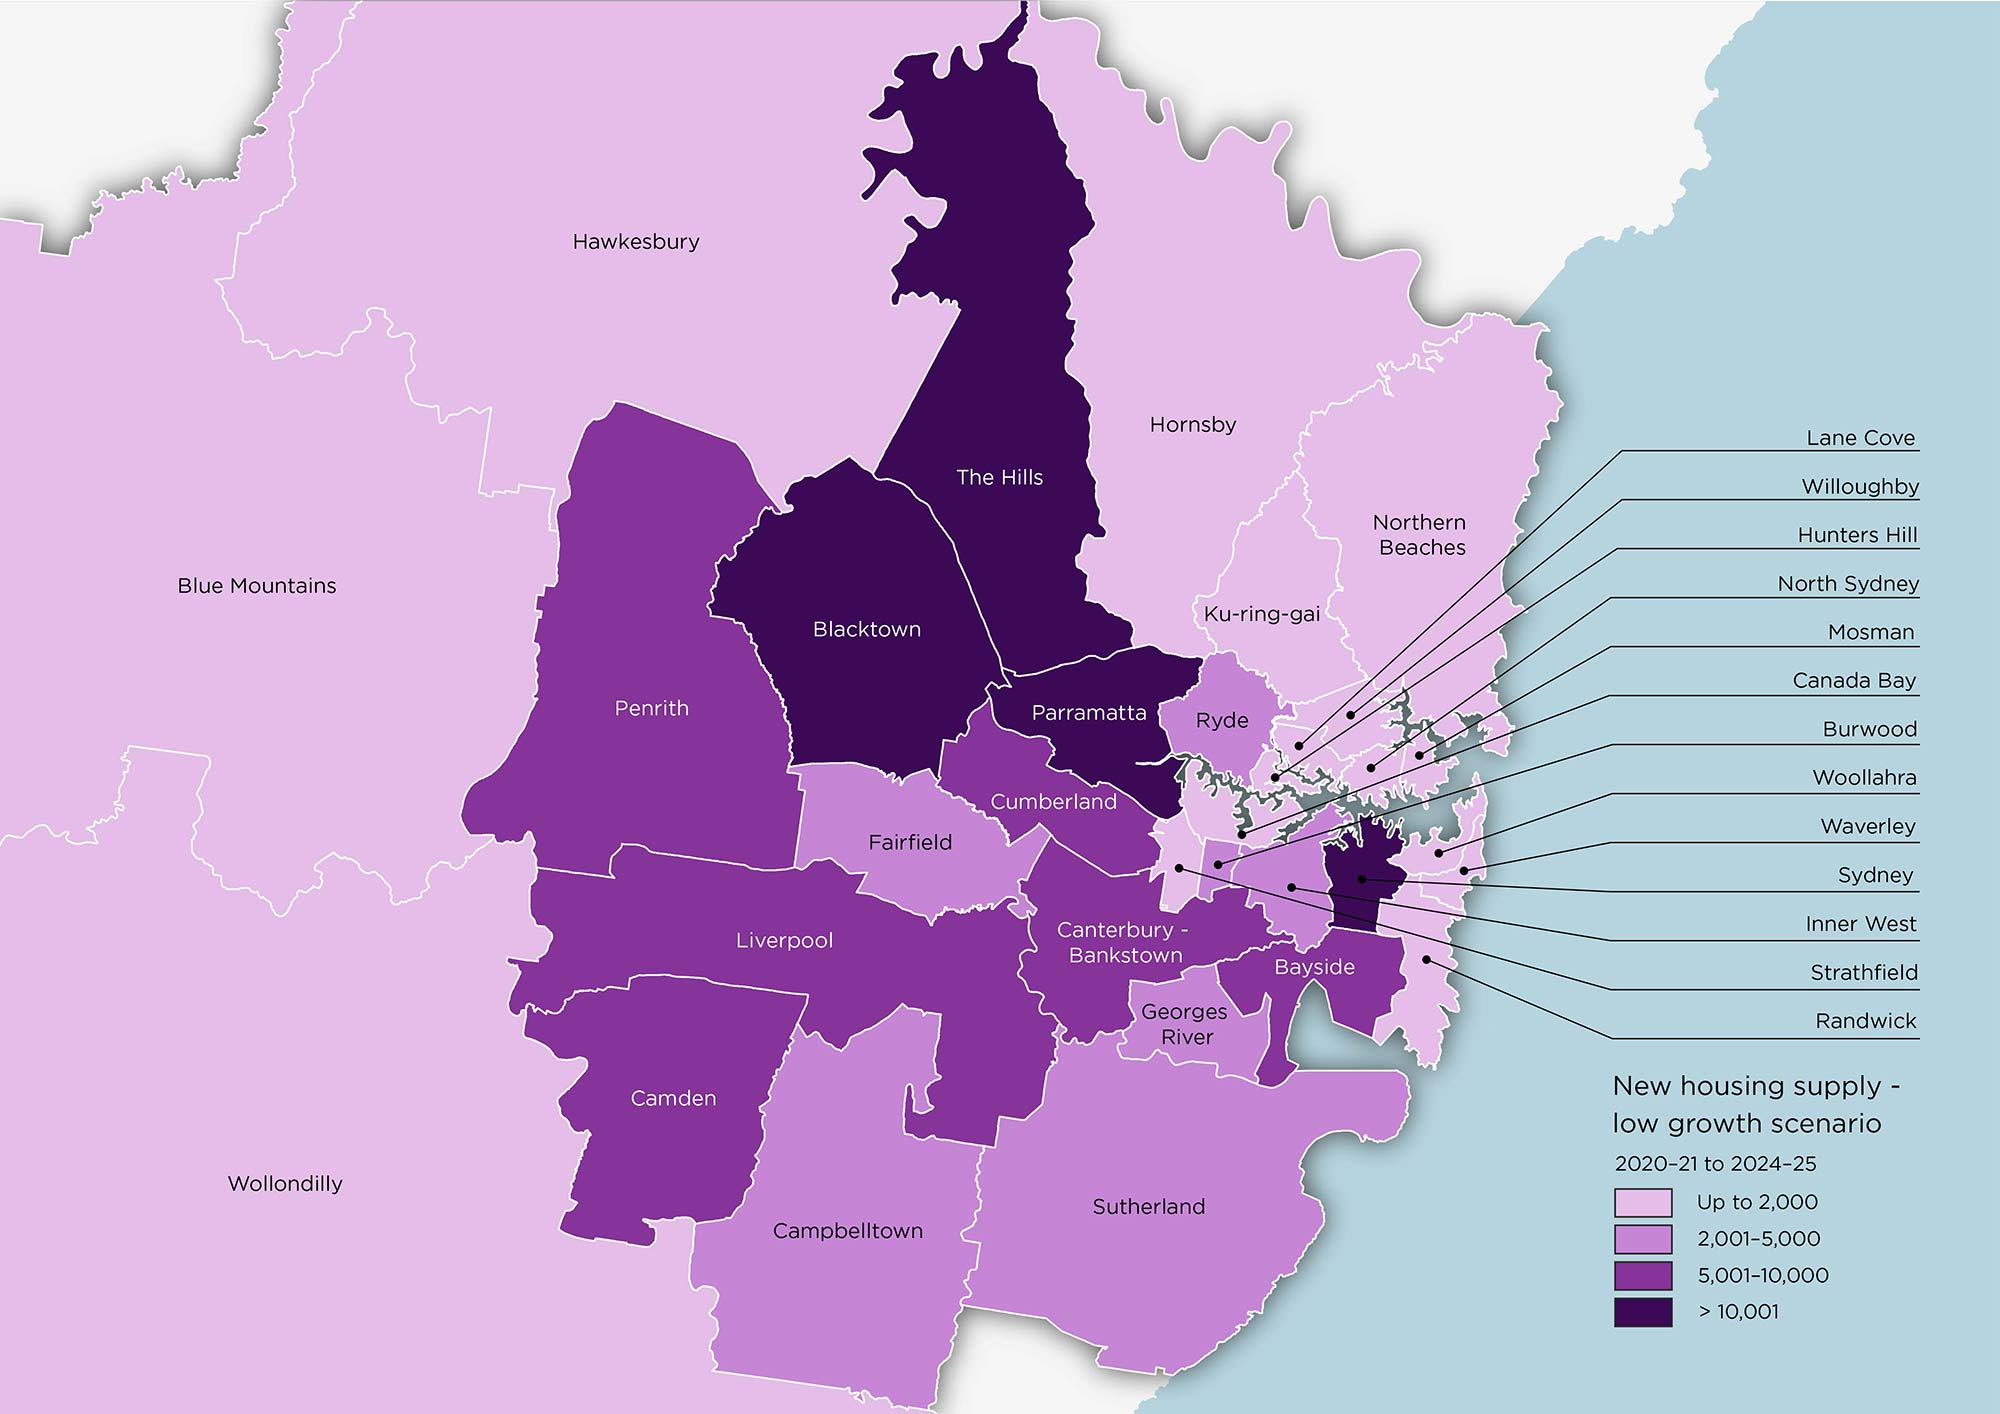

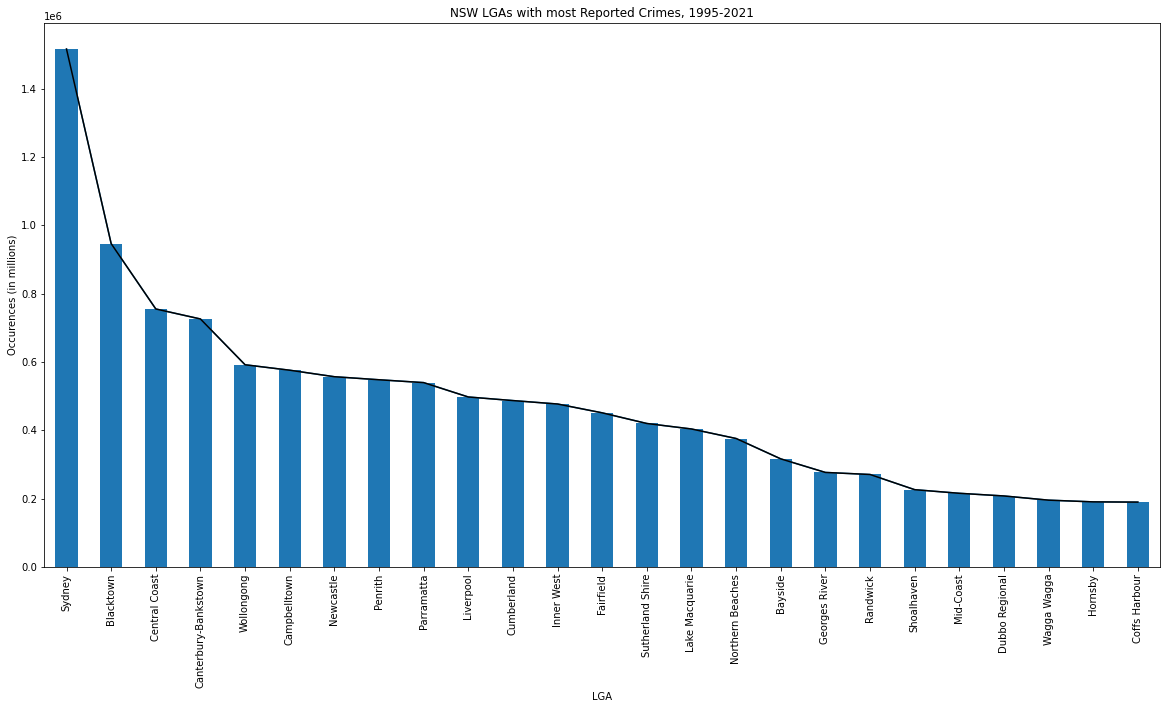

In [11]:
LGAcrime_total = Incident_by_lga.groupby('LGA')['total_lga'].sum()
LGAcrime_total = LGAcrime_total.sort_values(ascending=False).head(25)
LGAcrime_total.plot(kind='bar')
LGAcrime_total.plot(figsize=(20,10))
LGAcrime_total.plot(ylabel='Occurences (in millions)', title='NSW LGAs with most Reported Crimes, 1995-2021', color='black')
plt.xticks(rotation=90)
plt.show()

The __City of Sydney__ LGA has reported the most crimes since 1995, followed by __Blacktown__, the __Central Coast__, __Canterbury-Bankstown__, __Wollongong__ and __Newcastle__.

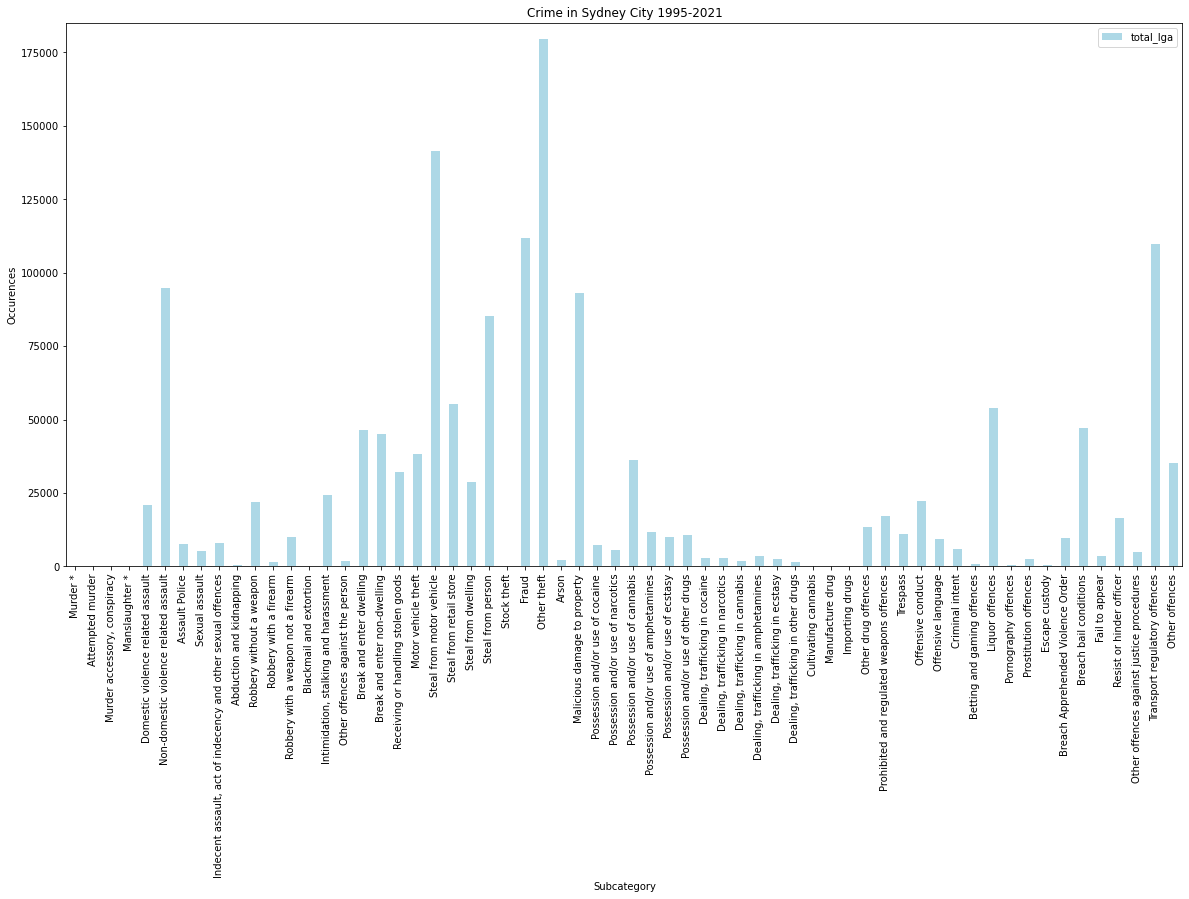

In [12]:
sydneyCity_df = Incident_by_lga[Incident_by_lga['LGA'] == 'Sydney']

sydneyCity_df.plot(kind='bar',x='Subcategory', y='total_lga', 
              ylabel='Occurences', title='Crime in Sydney City 1995-2021', figsize=(20,10), color = 'lightblue')
plt.ylim((None,185000))
plt.show()

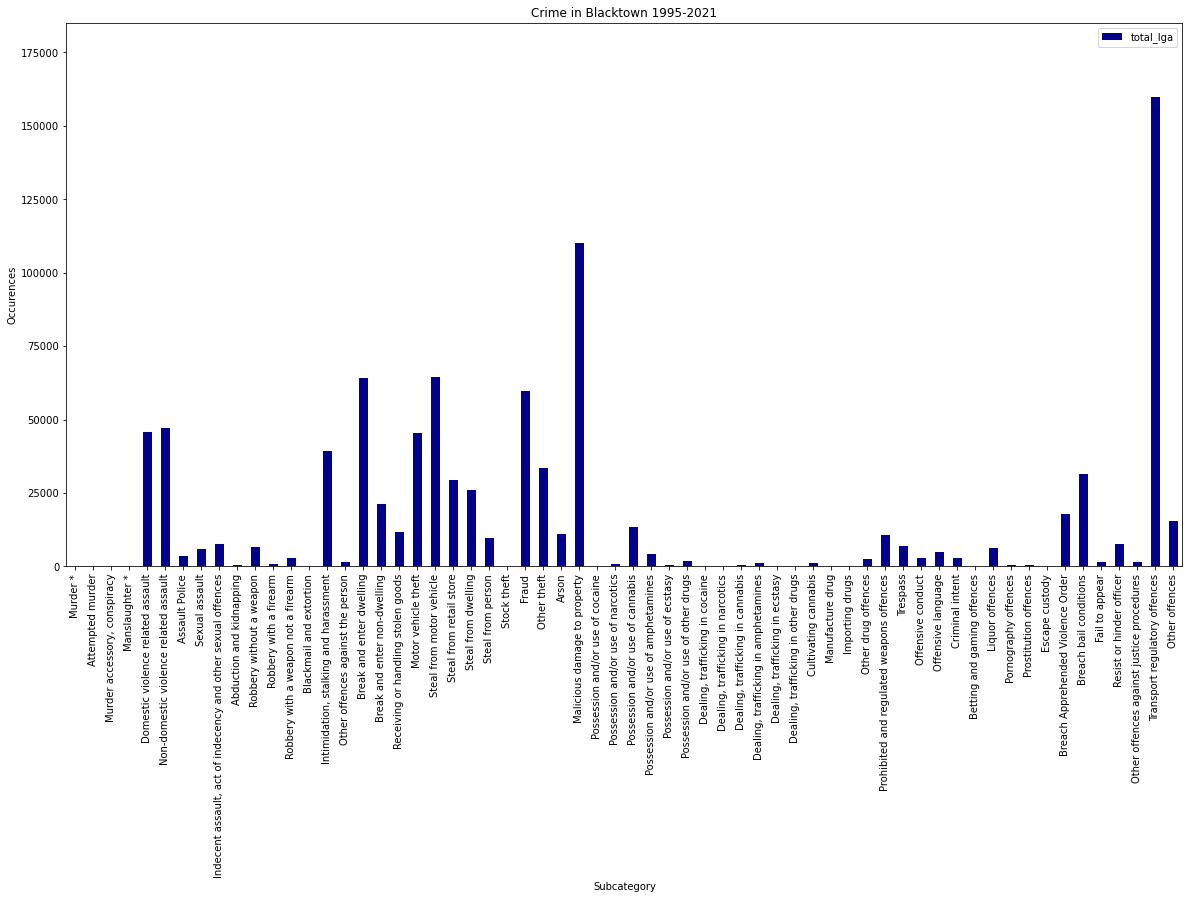

In [13]:
blacktown_df = Incident_by_lga[Incident_by_lga['LGA'] == 'Blacktown']

blacktown_df.plot(kind='bar',x='Subcategory', y='total_lga', 
              ylabel='Occurences', title='Crime in Blacktown 1995-2021', figsize=(20,10), color = 'darkblue')
plt.ylim((None,185000))
plt.show()

These plots of the top 2 LGAs with the most reported crimes, __Sydney City__ and __Blacktown__ (in Greater Western Sydney) highlight how the distribution of crime differs significantly across key regions of Sydney. The most common type of crime in *Sydney City* is __"Other theft"__ (which isn't particularly useful), __"Steal from motor vehicle"__ and __"Fraud"__. However the most common crimes in *Blacktown* are __"Transport regulatory offences"__ and __"Malicious damage to property"__.

Other key differences are seen in the ratio of *Domestic violence* to *Non-domestic violence* related assault, whilst these two categories of assault are basically level in Blacktown, domestic violence related assault is quite minimal in comparison to non-domestic violence related assault in Sydney City.

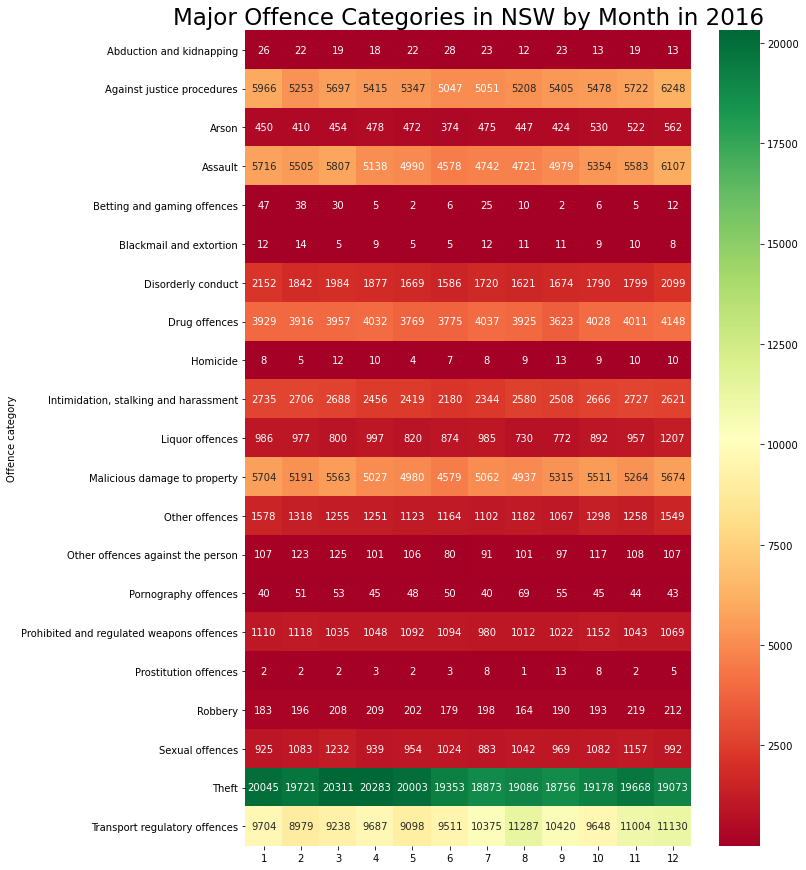

In [14]:
majorOffences = Incidents_NSW.groupby('Offence category').sum()
majorOffence_2016 = majorOffences.iloc[:, 252:264]

x_axis_mths = [1,2,3,4,5,6,7,8,9,10,11,12] # labels for x-axis

plt.figure(figsize = (10,15))
hm = sns.heatmap(majorOffence_2016, xticklabels=x_axis_mths, annot=True, cmap='RdYlGn', fmt='g')
hm.set_title('Major Offence Categories in NSW by Month in 2016', fontsize=23)

plt.show()

This heatmap provides useful insight as to how common the major offence categories are throughout the year. __Assault__ seems to be more prevalent during the warmer months of the year with the biggest count in 2016 being December. A similar pattern is evident with __Disorderly conduct__ with January and December having the highest counts of this offence. This could lead us to believe that offences which are more physical in nature are prevalent during hotter times of the year. 

## K-Means Clustering

In this section we will utilise K-means clustering to measure the number of crime indicators, grouping 
together  the  LGAs  with  highest  numbers  of  crime.  This  will  be  done  by 
partitioning NSW LGAs into k clusters where each LGA belongs to the 
cluster with the nearest mean. First we must prepare the data for clustering analysis.

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
#Sum of crimes from all years
sum_offence = Incident_by_lga.iloc[:, 3:321].sum(axis=1)
#New dataframe with selected columns
Incident_total1 = Incident_by_lga[['LGA', 'Offence category', 'Subcategory']].copy()
Incident_total1['total crimes'] = sum_offence
#group by offence category (gets rid of subcategory)
offence_cat_total = Incident_total1.groupby(['LGA', 'Offence category']).sum()

In [17]:
#pivot table (dataset must be in this form for cluster analysis)
offence_cat_totalPiv = offence_cat_total.pivot_table('total crimes', ['LGA'], 'Offence category')

offence_cat_totalPiv.head()

Offence category,Abduction and kidnapping,Against justice procedures,Arson,Assault,Betting and gaming offences,Blackmail and extortion,Disorderly conduct,Drug offences,Homicide,"Intimidation, stalking and harassment",...,Malicious damage to property,Other offences,Other offences against the person,Pornography offences,Prohibited and regulated weapons offences,Prostitution offences,Robbery,Sexual offences,Theft,Transport regulatory offences
LGA,,,,,,,,,,,,,,,,,,,,,
Albury,66,13876,1422,16556,101,4,8132,7869,37,5825,...,24673,3790,279,100,3151,12,538,2909,73927,181
Armidale Regional,22,5080,954,9831,10,3,5302,3695,12,3182,...,14083,2226,222,46,1347,0,350,1788,37643,66
Ballina,34,4960,585,8774,26,2,3216,3690,23,2842,...,11540,1922,142,44,1040,2,286,1685,37728,29
Balranald,1,584,38,907,1,1,699,729,4,319,...,892,601,16,2,357,0,3,158,2581,4
Bathurst Regional,39,8151,1076,12264,24,5,4131,5089,11,4024,...,16664,2550,233,32,2075,1,483,2179,48112,117


In [18]:
offence_cat_totalPiv.describe()

Offence category,Abduction and kidnapping,Against justice procedures,Arson,Assault,Betting and gaming offences,Blackmail and extortion,Disorderly conduct,Drug offences,Homicide,"Intimidation, stalking and harassment",...,Malicious damage to property,Other offences,Other offences against the person,Pornography offences,Prohibited and regulated weapons offences,Prostitution offences,Robbery,Sexual offences,Theft,Transport regulatory offences
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,...,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,63.488550,8886.167939,1180.893130,12910.137405,28.206107,16.801527,4179.435115,6388.900763,33.931298,4825.961832,...,16822.351145,3093.030534,236.022901,61.091603,1933.557252,36.122137,1366.618321,2137.022901,61599.114504,10355.770992
std,108.131356,13131.364071,1866.188243,18658.813749,83.289922,39.075552,5467.807810,11422.877103,57.000566,6637.964879,...,22009.002694,4133.656896,303.227751,81.976868,2464.895751,237.121781,3637.313600,2689.571174,99342.308625,25904.557909
min,0.000000,3.000000,6.000000,36.000000,0.000000,0.000000,17.000000,56.000000,0.000000,10.000000,...,37.000000,40.000000,2.000000,0.000000,15.000000,0.000000,0.000000,14.000000,90.000000,0.000000
25%,8.000000,1248.500000,180.000000,2212.500000,3.000000,0.000000,1168.500000,1034.000000,6.000000,924.500000,...,3086.000000,881.500000,50.000000,10.500000,492.000000,0.000000,30.000000,452.000000,7880.500000,11.500000
50%,23.000000,3802.000000,417.000000,6280.000000,10.000000,3.000000,2600.000000,2545.000000,13.000000,2204.000000,...,8076.000000,1884.000000,123.000000,28.000000,1045.000000,1.000000,171.000000,1116.000000,20794.000000,67.000000
75%,67.500000,10112.500000,1429.500000,14348.000000,27.000000,10.500000,5155.500000,6959.500000,33.000000,5838.500000,...,20673.000000,3520.500000,276.500000,82.000000,2218.500000,4.000000,871.000000,2836.000000,71793.000000,2760.500000
max,561.000000,82259.000000,11102.000000,123328.000000,850.000000,248.000000,48789.000000,110689.000000,334.000000,39395.000000,...,110503.000000,35253.000000,1740.000000,446.000000,17037.000000,2599.000000,33063.000000,13825.000000,763817.000000,159917.000000


In [19]:
top3_offence = offence_cat_totalPiv.loc[:, ('Theft', 'Assault', 'Malicious damage to property')]
top3_offence
km = KMeans(n_clusters=2)
km.fit(top3_offence)

KMeans(n_clusters=2)

In [20]:
top3_offence['label'] = km.predict(top3_offence)

In [21]:
top3_offence_mean = top3_offence.groupby(['label']).agg('mean')
top3_offence_mean

Offence category,Theft,Assault,Malicious damage to property
label,,,
0,31451.608696,7205.773913,9781.695652
1,278284.312500,53910.250000,67427.062500


Here, *Cluster 0* is defined as low crime areas, whilst *Cluster 1* consists of areas of higher crime.

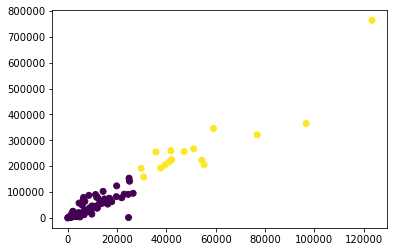

In [22]:
fig = plt.scatter(top3_offence['Assault'], top3_offence['Theft'], c=top3_offence['label'])

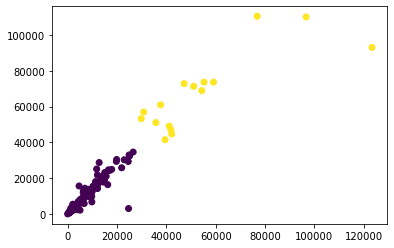

In [23]:
fig = plt.scatter(top3_offence['Assault'], top3_offence['Malicious damage to property'], c=top3_offence['label'])

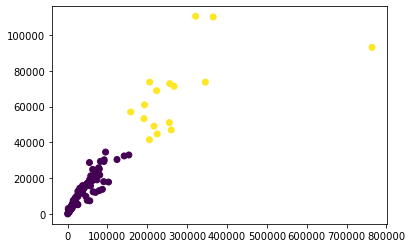

In [24]:
fig = plt.scatter(top3_offence['Theft'], top3_offence['Malicious damage to property'], c=top3_offence['label'])

We note a clearly defined seperation of clusters, and that all plots are following a positive linear trend.

### Hierarchical Clustering

In [25]:
dist = pdist(offence_cat_totalPiv, 'euclidean')
linkage_matrix = linkage(dist, method = 'complete')

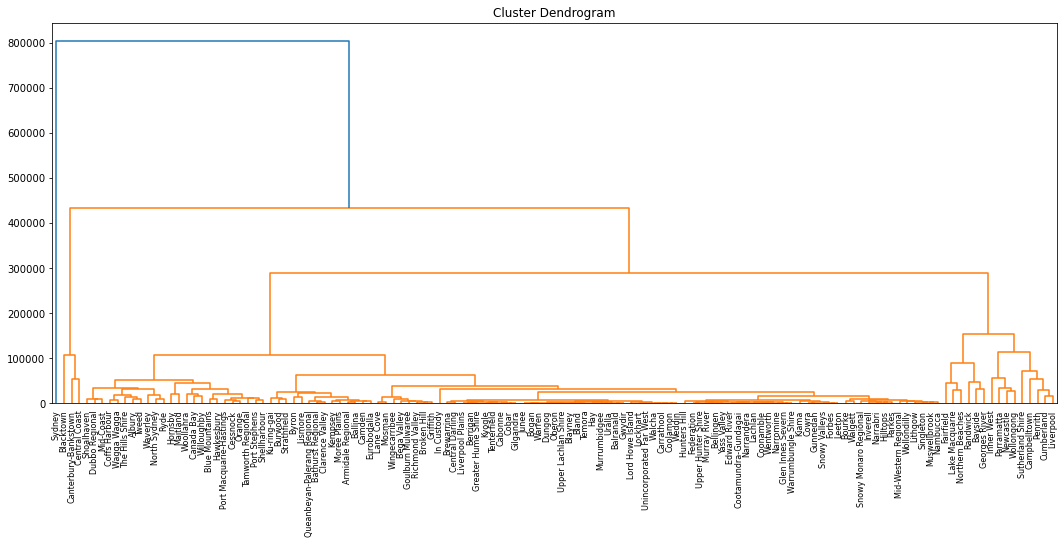

In [26]:
plt.figure(figsize=(18,7))
plt.title("Cluster Dendrogram")

dendrogram(linkage_matrix, labels=offence_cat_totalPiv.index, leaf_font_size=8)
plt.show()

The Dendrogram visualises our two-cluster solution. Looking at the dendrogram for the NSW, LGA crime dataset, we can see our datapoints are very imbalanced. From the top of the tree, there are two distinct groups; one group consists of what holds the majority of branches. 
The other cluster in the bottom right only consists of a few select LGAs, which are some of the most dangerous LGAs of NSW, a similar cluster is also seen in the bottom left.

## Data Preperation and Exploration for LGA_stats

In [27]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [28]:
#data for LGAs 2016
LGA_stats = pd.read_excel('files/LGA_stats.xlsx')
# ref: https://explore.data.abs.gov.au/vis (Data items have to be selected manually)
LGA_stats.head(9)

,Region,Data Item,Unit of measure,2016
0,Albury,Estimated resident population (no.),Number,52171.0
1,Albury,Employee income earners (no.),Number,25821.0
2,Albury,Total employee income ($m),"Australian Dollars, Millions",1313.2
3,Albury,Median employee income ($),"Australian Dollars, Tens",45382.0
4,Albury,Newstart allowance (no.),Number,2055.0
5,Albury,Mean household net worth ($),"Australian Dollars, Tens",783.8
6,Albury,Median equivalised total household income (wee...,"Australian Dollars, Tens",776.0
7,Albury,Completed year 12 or equivalent (%),Percent,41.2
8,Albury,Completed year 10 or equivalent (%),Percent,25.1


Before getting into analysis we have to prepare the data:
1. Extract the 2016 crime data as we are only using 2016 LGA data.
2. Take only the necessary columns from LGA_stats to be used in our analysis.
3. Merge these datasets into something we can use for our regression models.

In [29]:
#Sum the crimes in 2016 to one column rather than for every month.
Incident_by_lga = Incident_by_lga[~Incident_by_lga['LGA'].isin(['In Custody'])]
crime_2016 = Incident_by_lga.iloc[:, 255:267].sum(axis=1)
Incident_lga_2016 = Incident_by_lga[['LGA', 'Offence category', 'Subcategory']].copy()
Incident_lga_2016['2016'] = crime_2016
Incident_lga_2016.head()

,LGA,Offence category,Subcategory,2016
0,Albury,Homicide,Murder *,2
1,Albury,Homicide,Attempted murder,1
2,Albury,Homicide,"Murder accessory, conspiracy",0
3,Albury,Homicide,Manslaughter *,0
4,Albury,Assault,Domestic violence related assault,284


In [30]:
#Total crimes for each LGA using groupby.sum
#This shows the total crimes in each LGA
Tcrimes = Incident_lga_2016.groupby(['LGA']).sum()
TCO = Incident_lga_2016.groupby(['LGA', 'Offence category']).sum()
TCO = TCO.rename({'2016': 'Total crimes'}, axis=1)
total_crime = Tcrimes.rename({'2016': 'Total crimes'}, axis=1)
#Somewhere I accidently made the LGA the index so now i'm setting it back
total_crime.reset_index(level=0, inplace=True)
total_crime['LGA'] = total_crime['LGA'].astype(str)
total_crime.head()

,LGA,Total crimes
0,Albury,6232
1,Armidale Regional,4027
2,Ballina,2689
3,Balranald,190
4,Bathurst Regional,4012


In [31]:
#For regression model we are going to take a data item to compare with the total crimes
#We have taken median household income weekly to use here and have renamed some columns to make the merge later easier
median_income = LGA_stats[LGA_stats["Data Item"] == "Median equivalised total household income (weekly) ($)"]
house_income = median_income
house_income.columns = ['LGA', 'Data Item', 'Unit', 'Weekly household income (AUD)']
house_income = house_income.drop('Unit', 1)
#Reset index just because it's neater
house_income.reset_index(level=0, inplace=True)
#There is a space after LGA names in the dataset, the following line removes it.
house_income.LGA = house_income.LGA.str.rstrip()
house_income.head()

,index,LGA,Data Item,Weekly household income (AUD)
0,6,Albury,Median equivalised total household income (wee...,776.0
1,15,Armidale Regional,Median equivalised total household income (wee...,744.0
2,24,Ballina,Median equivalised total household income (wee...,745.0
3,33,Balranald,Median equivalised total household income (wee...,710.0
4,42,Bathurst Regional,Median equivalised total household income (wee...,817.0


In [32]:
#Merge the data sets
crime_income = pd.merge(total_crime, house_income, on="LGA")
#Dropping the extra column I made above when resetting index
crime_income = crime_income.drop(['index', 'Data Item'], 1)
crime_income.head()

,LGA,Total crimes,Weekly household income (AUD)
0,Albury,6232,776.0
1,Armidale Regional,4027,744.0
2,Ballina,2689,745.0
3,Balranald,190,710.0
4,Bathurst Regional,4012,817.0


In [33]:
#In order to make the model more accurate we will establish crime rates for each LGA
#This is done by dividing population by 1000 then dividing crime by that result for crimes per 1000
#We wil now create a dataset that includes both population and total crime.

pop = LGA_stats.loc[LGA_stats['Data Item'].isin(['Estimated resident population (no.)'])]
#pop has our population for each LGA
pop = pop.drop(['Unit of measure', 'Data Item'], axis = 1)
pop.columns = ['LGA', 'Population']
#remove whitespace
pop.LGA = pop.LGA.str.rstrip()

employee_income = LGA_stats.loc[LGA_stats['Data Item'].isin(['Median employee income ($)'])]
employee_income = employee_income.drop(['Unit of measure', 'Data Item'], axis = 1)
employee_income.columns = ['LGA', 'Employee Income (AUD)']
#remove whitespace
employee_income.LGA = employee_income.LGA.str.rstrip()

house_net = LGA_stats.loc[LGA_stats['Data Item'].isin(['Mean household net worth ($)'])]
house_net = house_net.drop(['Unit of measure', 'Data Item'], axis = 1)
house_net.columns = ['LGA', 'Household net worth (AUD)']
#remove whitespace
house_net.LGA = house_net.LGA.str.rstrip()

education = LGA_stats.loc[LGA_stats['Data Item'].isin(['Completed year 12 or equivalent (%)'])]
education = education.drop(['Unit of measure', 'Data Item'], axis = 1)
education.columns = ['LGA', '% Completed yr 12']
#remove whitespace
education.LGA = education.LGA.str.rstrip()

data_frames = [crime_income, pop, employee_income, house_net, education]
from functools import reduce
LGA_data = reduce(lambda  left,right: pd.merge(left,right,on=['LGA'], how='outer'), data_frames)
crimerate_LGA = LGA_data['Total crimes'] / (LGA_data['Population'] / 1000)
house_netx10 = LGA_data['Household net worth (AUD)'] * 10
LGA_data = LGA_data.drop(['Household net worth (AUD)'], axis = 1)
LGA_data['Crimes per 1000'] = crimerate_LGA
LGA_data['Household net worth (AUD)'] = house_netx10

LGA_data.head()

,LGA,Total crimes,Weekly household income (AUD),Population,Employee Income (AUD),% Completed yr 12,Crimes per 1000,Household net worth (AUD)
0,Albury,6232.0,776.0,52171.0,45382.0,41.2,119.453336,7838.0
1,Armidale Regional,4027.0,744.0,29310.0,39733.0,50.9,137.393381,10265.0
2,Ballina,2689.0,745.0,42993.0,40397.0,41.6,62.545065,11370.0
3,Balranald,190.0,710.0,2330.0,39057.0,28.5,81.545064,11713.0
4,Bathurst Regional,4012.0,817.0,42244.0,47994.0,42.3,94.972067,8886.0


## Economic Factors of LGA's

We have already seen which LGA's have the most crime but in this short exploration we will find out which LGA's have the highest incomes, populations, household net worths and education standards.

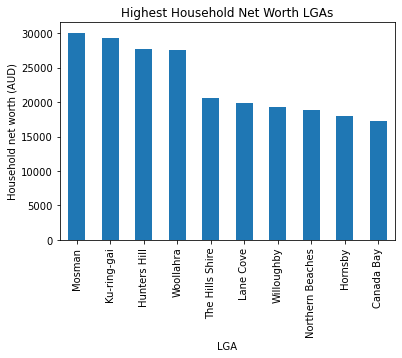

In [34]:
LGA_highs = LGA_data.groupby('LGA')['Household net worth (AUD)'].sum()
LGA_highs = LGA_highs.sort_values(ascending=False).head(10)
LGA_highs.plot(kind='bar')
plt.title('Highest Household Net Worth LGAs')
plt.ylabel('Household net worth (AUD)')
plt.show()

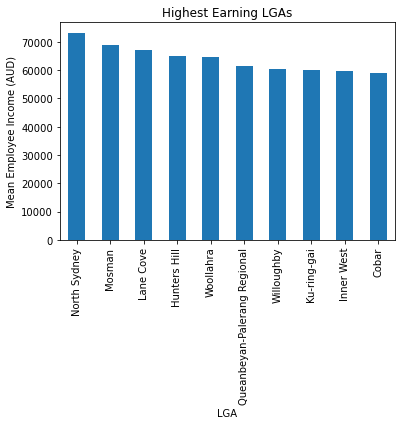

In [35]:
LGA_income = LGA_data.groupby('LGA')['Employee Income (AUD)'].sum()
LGA_income = LGA_income.sort_values(ascending=False).head(10)
LGA_income.plot(kind='bar')
plt.title('Highest Earning LGAs')
plt.ylabel('Mean Employee Income (AUD)')
plt.show()

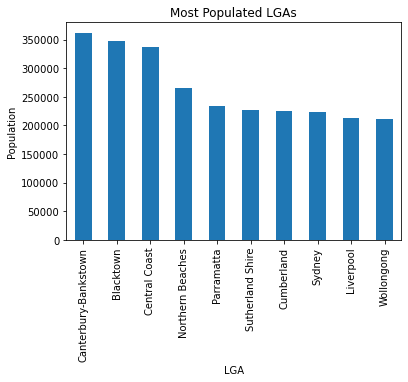

In [36]:
LGA_pop = LGA_data.groupby('LGA')['Population'].sum()
LGA_pop = LGA_pop.sort_values(ascending=False).head(10)
LGA_pop.plot(kind='bar')
plt.title('Most Populated LGAs')
plt.ylabel('Population')
plt.show()

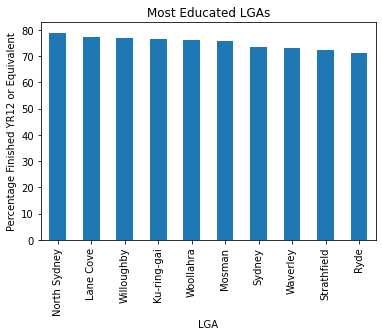

In [37]:
LGA_edu = LGA_data.groupby('LGA')['% Completed yr 12'].sum()
LGA_edu = LGA_edu.sort_values(ascending=False).head(10)
LGA_edu.plot(kind='bar')
plt.title('Most Educated LGAs')
plt.ylabel('Percentage Finished YR12 or Equivalent')
plt.show()

## Economic Factors and Crime, Is There A Correlation?

The data above has shown both the economic factors, and crime data of NSW LGA's. We will now analyse these key statistics to try and find a relationship that we can draw informed conclusions from.

* The first analysis is going to be Crimes per 1000 and Household net worth

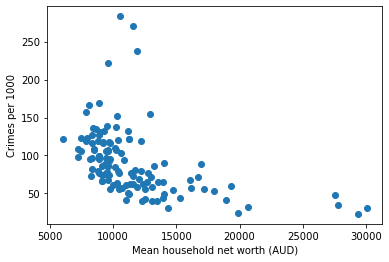

In [38]:
plt.scatter(LGA_data['Household net worth (AUD)'], LGA_data['Crimes per 1000'])
plt.ylabel('Crimes per 1000')
plt.xlabel('Mean household net worth (AUD)')
plt.show()

Looking at the plot it is possible that a linear regression model could provide us with accurate predicted values, so we will split the data into training and testing sets.

In [39]:
Y = LGA_data[['Crimes per 1000']]
X = LGA_data[['Household net worth (AUD)']]
X_train, X_test, Y_train, Y_test = train_test_split(X.fillna(X.median()), Y.fillna(Y.median()), test_size=0.15, random_state=10)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
predicted = regressor.predict(X_test)
mse = ((np.array(Y_test)-predicted)**2).sum()/len(Y_test)
r2 = r2_score(Y_test, predicted)
print("MSE:", mse)
print("Root MSE:", np.sqrt(mse))
print("R Squared:", r2)
accuracy = regressor.score(X_test, Y_test)
"Accuracy: {}%".format(int(round(accuracy*100)))

MSE: 843.4006098122338
Root MSE: 29.0413603299197
R Squared: 0.16129999386454008


'Accuracy: 16%'

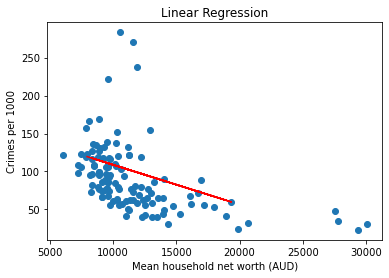

In [40]:
Y_pred = regressor.predict(X_test)
plt.scatter(X, Y)
plt.plot(X_test, Y_pred, color = 'red')
plt.title('Linear Regression')
plt.ylabel('Crimes per 1000')
plt.xlabel('Mean household net worth (AUD)')
plt.show()

As you can see from the model as well was the R squared values, linear regression has a very low accuracy for predicting crimes according to household net worth. This means either the data doesn't have a correlation or we are not using the right model.
Now we'll try using the same dataset but aim for a better accuracy than 16% with a polynomial regression model.

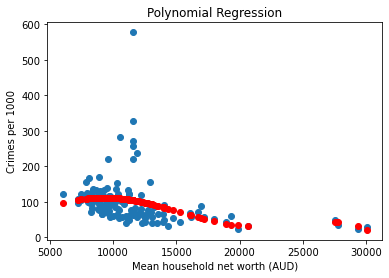

In [41]:
from sklearn.preprocessing import PolynomialFeatures
YP = LGA_data[['Crimes per 1000']].fillna(Y.mean())
XP = LGA_data[['Household net worth (AUD)']].fillna(X.mean())
# Set PolynomialFeatures to degree 2 and store in the variable pre_process
# Degree 2 preprocesses x to 1, x and x^2
# Degree 3 preprocesses x to 1, x, x^2 and x^3
# and so on..
pre_process = PolynomialFeatures(degree=5)
# Transform our x input to 1, x and x^2
XP_poly = pre_process.fit_transform(XP)

pr_model = LinearRegression()
# Fit our preprocessed data to the polynomial regression model
pr_model.fit(XP_poly, YP)
# Store our predicted crime values in the variable YP_pred
YP_pred = pr_model.predict(XP_poly)
# Plot our model on our data
plt.scatter(XP, YP)
plt.title('Polynomial Regression')
plt.ylabel('Crimes per 1000')
plt.xlabel('Mean household net worth (AUD)')
plt.scatter(XP, YP_pred, c='red')

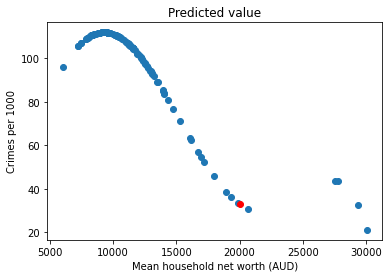

In [42]:
# pre_process.fit_transform
# predict crime for a mean net worth of 20k
YP_new = pr_model.predict(pre_process.fit_transform([[20000]]))
plt.title('Predicted value')
plt.ylabel('Crimes per 1000')
plt.xlabel('Mean household net worth (AUD)')
plt.scatter(XP, YP_pred)
plt.scatter(20000, YP_new, c = "red")

In [43]:
predictedP = regressor.predict(XP)
mseP = ((np.array(YP_pred)-predictedP)**2).sum()/len(YP_pred)
r2P = r2_score(YP_pred, predictedP)
print("MSE:", mseP)
print("Root MSE:", np.sqrt(mseP))
print("R Squared:", r2P)
accuracyP = regressor.score(XP, YP_pred)
"Accuracy: {}%".format(int(round(accuracyP*100)))

MSE: 81.52778180116789
Root MSE: 9.029273603184693
R Squared: 0.821281873514413


'Accuracy: 82%'

Our Polynomial regression model has not only returned a scatter plot very similar to our actual data but has also provided a predictive model with an accuracy of 83%. While the value for MSE is higher than expected we can still draw a correlation between crimes and mean household net worth. From this model we can expect that LGA's with higher average household net worths experience lower crime rates.

Now to assess another major economic factor we will see if education has any correlation to crime rate. The way we will be assessing education is as a percentage of people who finished year 12 or equivalent, and our crime rate will be crimes committed for every 1000 people to ensure the data is scaled correctly and higher populations don't skew the data.

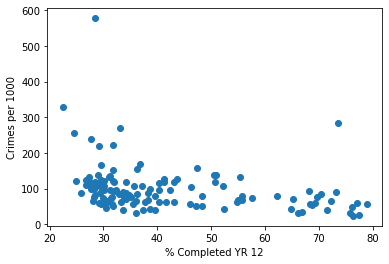

In [44]:
plt.scatter(LGA_data['% Completed yr 12'], LGA_data['Crimes per 1000'])
plt.ylabel('Crimes per 1000')
plt.xlabel('% Completed YR 12')
plt.show()

In [45]:
YE = LGA_data[['Crimes per 1000']]
XE = LGA_data[['% Completed yr 12']]
XE_train, XE_test, YE_train, YE_test = train_test_split(XE.fillna(XE.median()), YE.fillna(YE.median()), test_size=0.01, random_state=10)
regressorE = LinearRegression()
regressorE.fit(XE_train, YE_train)
predictedE = regressorE.predict(XE_test)
mseE = ((np.array(YE_test)-predictedE)**2).sum()/len(YE_test)
r2E = r2_score(YE_test, predictedE)
print("MSE:", mseE)
print("Root MSE:", np.sqrt(mseE))
print("R Squared:", r2E)
accuracyE = regressorE.score(XE_test, YE_test)
"Accuracy: {}%".format(int(round(accuracyE*100)))

MSE: 247.18358620523333
Root MSE: 15.722073215871797
R Squared: 0.7814755527451493


'Accuracy: 78%'

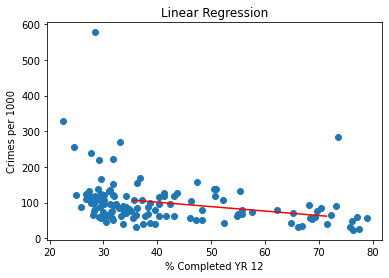

In [46]:
YE_pred = regressorE.predict(XE_test)
plt.scatter(XE, YE)
plt.plot(XE_test, YE_pred, color = 'red')
plt.title('Linear Regression')
plt.ylabel('Crimes per 1000')
plt.xlabel('% Completed YR 12')
plt.show()

For this relationship linear regression has a decently accurate model with 78% accuracy, while this is better than the last linear regression model a better accuracy could still potentially be achieved with a polynomial regression model.

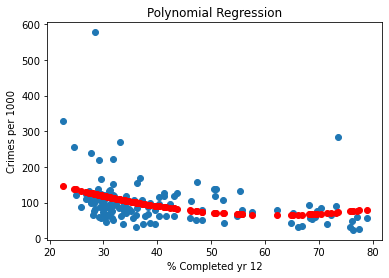

In [47]:
YPE = LGA_data[['Crimes per 1000']].fillna(YE.median())
XPE = LGA_data[['% Completed yr 12']].fillna(XE.median())
# Set PolynomialFeatures to degree 2 and store in the variable pre_process
# Degree 2 preprocesses x to 1, x and x^2
# Degree 3 preprocesses x to 1, x, x^2 and x^3
# and so on..
pre_processE = PolynomialFeatures(degree=2)
# Transform our x input to 1, x and x^2
XPE_poly = pre_processE.fit_transform(XPE)

pr_modelE = LinearRegression()
# Fit our preprocessed data to the polynomial regression model
pr_modelE.fit(XPE_poly, YPE)
# Store our predicted crime values in the variable YP_pred
YPE_pred = pr_modelE.predict(XPE_poly)
# Plot our model on our data
plt.scatter(XPE, YPE)
plt.title('Polynomial Regression')
plt.ylabel('Crimes per 1000')
plt.xlabel('% Completed yr 12')
plt.scatter(XPE, YPE_pred, c='red')

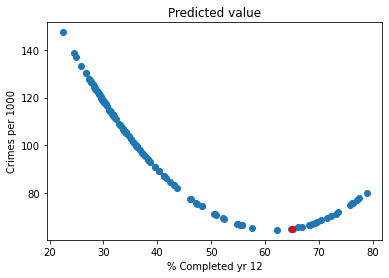

In [48]:
# pre_process.fit_transform
# predict crime for a completion rate of 65%
YPE_new = pr_modelE.predict(pre_processE.fit_transform([[65]]))
plt.title('Predicted value')
plt.ylabel('Crimes per 1000')
plt.xlabel('% Completed yr 12')
plt.scatter(XPE, YPE_pred)
plt.scatter(65, YPE_new, c = "red")

In [49]:
predictedPE = regressorE.predict(XPE)
msePE = ((np.array(YPE_pred)-predictedPE)**2).sum()/len(YPE_pred)
r2PE = r2_score(YPE_pred, predictedPE)
print("MSE:", msePE)
print("Root MSE:", np.sqrt(msePE))
print("R Squared:", r2PE)
accuracyPE = regressorE.score(XPE, YPE_pred)
"Accuracy: {}%".format(int(round(accuracyPE*100)))

MSE: 110.33832690287024
Root MSE: 10.504205200912168
R Squared: 0.7726095326042465


'Accuracy: 77%'

For this relationship the linear regression actually has a greater accuracy than the polynomial regression. While both present large MSE's, the correlation of economic factors to total crimes committed is more substantial as we have now seen trends of more crime in less affluent and less educated LGA's

## Conclusion


At the beginning of the report we set out to find a relationship between the economic factors of an LGA and the amount of crime committed. From our research and analysis, we have plotted ecoomic factors against crime and have developed regression models that provide with greater insight as what to expect when facing less educated or less affluent LGA's. It is a trend across NSW that where there is higher standards of education there is less crime and where there is higher mean net worth there is also less crime. These discoveries not only fit our predictions but also can be tested against our regression models that can predict crime based on education or mean household value with an accuracy of over 75%.